In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.naive_bayes import BernoulliNB
os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2/sentiment') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2/sentiment'

In [39]:
data_path = ("yelp_labelled_2.csv")
reviews_raw = pd.read_csv(data_path, header=None)
reviews_raw.columns = ['review', 'positive']
reviews_raw.head(100)

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [40]:
positive = reviews_raw['positive']
positive_converted = []

for p in positive:
    if p == 1:
        p = 'pos'
        positive_converted.append(p)
    elif p == 0:
        p = 'neg'
        positive_converted.append(p)
reviews_raw['positive_converted'] = positive_converted
reviews_raw.head(10)

,review,positive,positive_converted
0,Wow... Loved this place.,1,pos
1,Crust is not good.,0,neg
2,Not tasty and the texture was just nasty.,0,neg
3,Stopped by during the late May bank holiday of...,1,pos
4,The selection on the menu was great and so wer...,1,pos
5,Now I am getting angry and I want my damn pho.,0,neg
6,Honeslty it didn't taste THAT fresh.),0,neg
7,The potatoes were like rubber and you could te...,0,neg
8,The fries were great too.,1,pos
9,A great touch.,1,pos


In [54]:
keywords = ['love', 'loved', 'awesome', 'incredible', 'wonderful', 'fantastic', 'great', 'friendly', 'delicious', 
            'best']

for key in keywords:
    reviews_raw[str(key)] = reviews_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [50]:
reviews_raw.head(10)

,review,positive,positive_converted,love,loved,awesome,incredible,wonderful,fantastic,great,friendly,delicious,best,romantic,reccomend,regular,favorite
0,Wow... Loved this place.,1,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,The fries were great too.,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,A great touch.,1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [43]:
reviews_raw['positive_converted'] = (reviews_raw['positive_converted'] == 'pos')

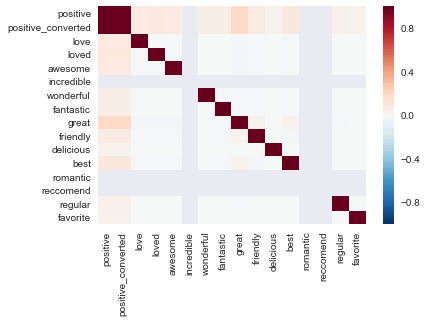

In [51]:
sns.heatmap(reviews_raw.corr())

In [52]:
data = reviews_raw[keywords]
target = reviews_raw['positive_converted']

In [55]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 703 points : 278


In [57]:
data_path_2 = ("amazon.csv")
amazon_raw = pd.read_csv(data_path_2, header=None)
amazon_raw.columns = ['review', 'positive']
amazon_raw.head(100)

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [58]:
positive = amazon_raw['positive']
positive_converted = []

for p in positive:
    if p == 1:
        p = 'pos'
        positive_converted.append(p)
    elif p == 0:
        p = 'neg'
        positive_converted.append(p)
amazon_raw['positive_converted'] = positive_converted
amazon_raw.head(10)

,review,positive,positive_converted
0,So there is no way for me to plug it in here i...,0,neg
1,"Good case, Excellent value.",1,pos
2,Great for the jawbone.,1,pos
3,Tied to charger for conversations lasting more...,0,neg
4,The mic is great.,1,pos
5,I have to jiggle the plug to get it to line up...,0,neg
6,If you have several dozen or several hundred c...,0,neg
7,If you are Razr owner...you must have this!,1,pos
8,"Needless to say, I wasted my money.",0,neg
9,What a waste of money and time!.,0,neg


In [62]:
keywords = ['love', 'loved', 'awesome', 'incredible', 'wonderful', 'fantastic', 'great', 'friendly', 'delicious', 
            'best']

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

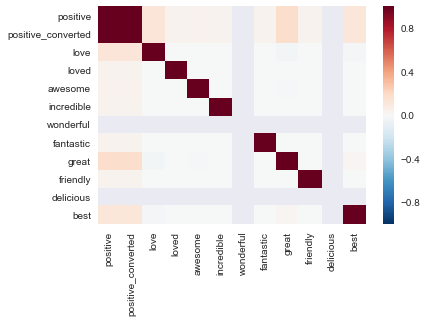

In [64]:
sns.heatmap(amazon_raw.corr())

In [60]:
amazon_raw['positive_converted'] = (amazon_raw['positive_converted'] == 'pos')

In [65]:
data = amazon_raw[keywords]
target = amazon_raw['positive_converted']

In [66]:
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 433
